In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

## Scenario C

In [58]:
# read the Scenario_C.xlsx file into a pandas DataFrame, the first tab is 'HH', second is 'HA', the third is 'AH', and teh fourth is 'AA'
df_hh = pd.read_excel('Scenario_C.xlsx', sheet_name='HH')
df_ha = pd.read_excel('Scenario_C.xlsx', sheet_name='HA')
df_ah = pd.read_excel('Scenario_C.xlsx', sheet_name='AH')
df_aa = pd.read_excel('Scenario_C.xlsx', sheet_name='AA')

In [59]:
# combine the four dataframes into one, adding a new column 'Configuration' to indicate the configuration
df_hh['Configuration'] = 'HH'
df_ha['Configuration'] = 'HA'
df_ah['Configuration'] = 'AH'
df_aa['Configuration'] = 'AA'
df = pd.concat([df_hh, df_ha, df_ah, df_aa], ignore_index=True)

In [60]:
# in df, rename the the pilots to be the following: 'Jacob': Pilot 1, 'Chan': Pilot 2, 'Grimmer': Pilot 3, 'Schnell': Pilot 4, 'McIntyre': Pilot 5, 'Smith': Pilot 6, 'Fleischmann': Pilot 7
df['Lead_Pilot'] = df['Lead_Pilot'].replace({'Jacob': 'Pilot 1', 'Chan': 'Pilot 2', 'Grimmer': 'Pilot 3', 'Schnell': 'Pilot 4', 'McIntyre': 'Pilot 5', 'Smith': 'Pilot 6', 'Fleischmann': 'Pilot 7'})

In [61]:
# get the average 'CM{i}_MOP_Time_to_Intercept_s' for i = 1, ..., 5 and add to a new column 'Avg_Time_to_Intercept_s'
df['Avg_Time_to_Intercept_s'] = df[[f'CM{i}_MOP_Time_to_Intercept_s' for i in range(1, 6)]].mean(axis=1)
df['Avg_Time_to_Consent_s'] = df[[f'CM{i}_MOP_Time_to_Consent_s' for i in range(1, 6)]].mean(axis=1)
df['Avg_Airspeed_Diff_at_Intercept_kt'] = df[[f'CM{i}_Airspeed_Diff_at_Intercept_kt' for i in range(1, 6)]].mean(axis=1)
df['Avg_Heading_Diff_at_Intercept_deg'] = df[[f'CM{i}_Heading_Diff_at_Intercept_deg' for i in range(1, 6)]].mean(axis=1)
df['Avg_Altitude_Offset_at_Intercept_ft'] = df[[f'CM{i}_Altitude_Offset_at_Intercept_ft' for i in range(1, 6)]].mean(axis=1)
df['Avg_Distance_from_CM_at_Intercept_nm'] = df[[f'CM{i}_Distance_from_CM_at_Intercept_nm' for i in range(1, 6)]].mean(axis=1)
df['Avg_Aspect_at_MELD_Range_deg'] = df[[f'CM{i}_Aspect_at_MELD_Range_deg' for i in range(1, 6)]].mean(axis=1)
df['Correct_Acquisition'] = df['Correct_Sort'].apply(lambda x: 1 if x == 'Y' else 0)

In [62]:
mop_list = ['Proportion_SAMs_Identified', 'Avg_SAM_ID_Time_s', 'Lead_Altitude_Deviation_Count', 'Wingman_Altitude_Deviation_Count',
            'Lead_Altitude_Deviation_Integrated_ft_s', 'Wingman_Altitude_Deviation_Integrated_ft_s', 'Proportion_CMs_Intercepted',
            'Avg_Time_to_Intercept_s', 'Avg_Time_to_Consent_s', 'Avg_Airspeed_Diff_at_Intercept_kt', 'Avg_Heading_Diff_at_Intercept_deg',
            'Avg_Altitude_Offset_at_Intercept_ft', 'Avg_Distance_from_CM_at_Intercept_nm', 'Avg_Aspect_at_MELD_Range_deg',
            'Num_Tactical_Comms', 'Correct_Acquisition']

In [87]:
def plot_mops(df, mop, scenario):
    col = mop
    configs = ['HH', 'HA', 'AH', 'AA']
    plt.figure(figsize=(10, 6))

    # Boxplot
    boxprops = dict(linestyle='-', linewidth=2, color='blue')
    medianprops = dict(linestyle='-', linewidth=2.5, color='red')
    plt.boxplot(
        [df[df['Configuration'] == c][col] for c in configs],
        labels=configs, boxprops=boxprops, medianprops=medianprops
    )

    # --- Overlay raw data ---
    # Assign each pilot a marker
    pilot_markers = {
        pilot: marker for pilot, marker in zip(
            sorted(df['Lead_Pilot'].unique()),
            ['o', 's', 'D', '^', 'v', '<', '>', 'P', 'X', '*']  # add more if needed
        )
    }

    # Scatter raw points with jitter
    for i, config in enumerate(configs, start=1):
        subset = df[df['Configuration'] == config]
        for pilot, pilot_df in subset.groupby('Lead_Pilot'):
            jitter = np.random.uniform(-0.1, 0.1, size=len(pilot_df))
            plt.scatter(
                np.full(len(pilot_df), i) + jitter,
                pilot_df[col],
                alpha=0.7,
                s=60,
                label=pilot if i == 1 else None,  # only add to legend once
                marker=pilot_markers[pilot]
            )

    col_label = col.replace('_', ' ')
    plt.title(f'{col_label} by Configuration')
    plt.ylabel(f'{col_label}')
    plt.grid(axis='y')

    # Unique legend for pilots
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), title='Pilot', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.savefig(f'Scenario {scenario}/Plots/{col}.jpg', dpi=500)

In [88]:
def create_data_summary(df, scenario):
    summary = df.groupby('Configuration')[mop_list].agg(['mean', 'std']).reset_index()
    # Flatten MultiIndex columns
    summary.columns = ['_'.join(col).strip() if col[1] else col[0] for col in summary.columns.values]
    summary.to_csv(f'Scenario {scenario}/Data_Summary.csv', index=False)

In [89]:
create_data_summary(df, 'C')

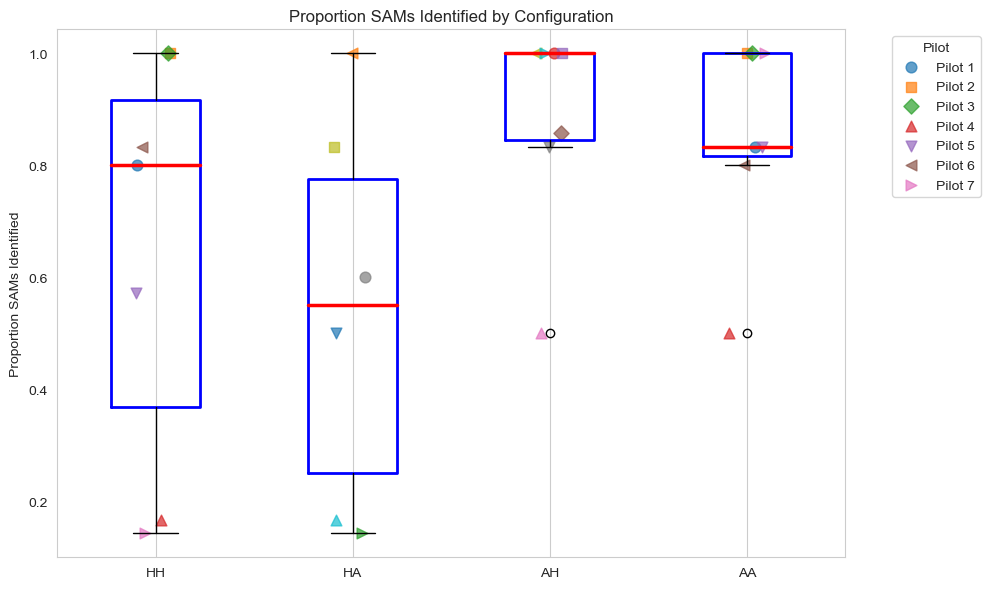

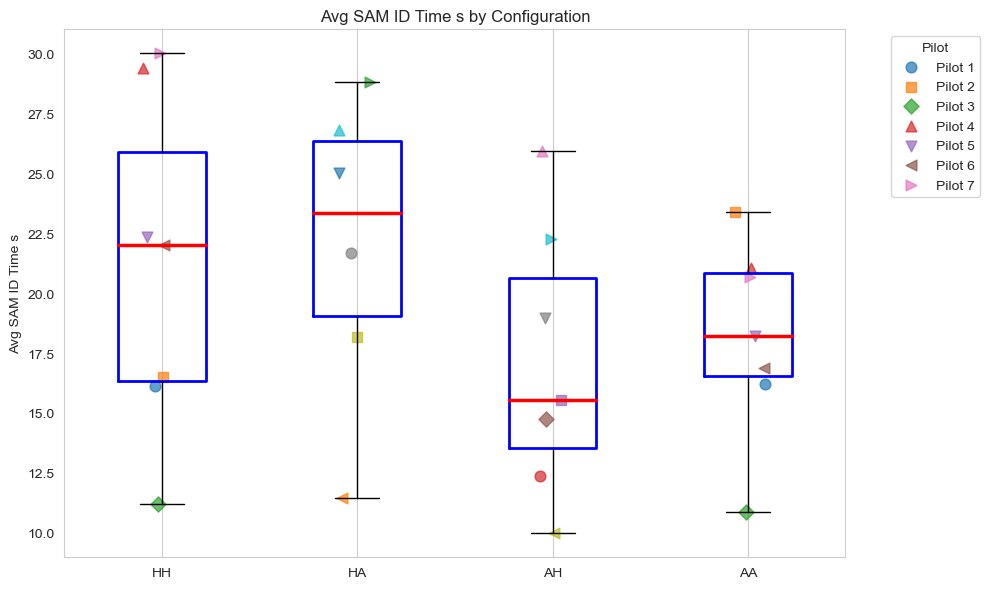

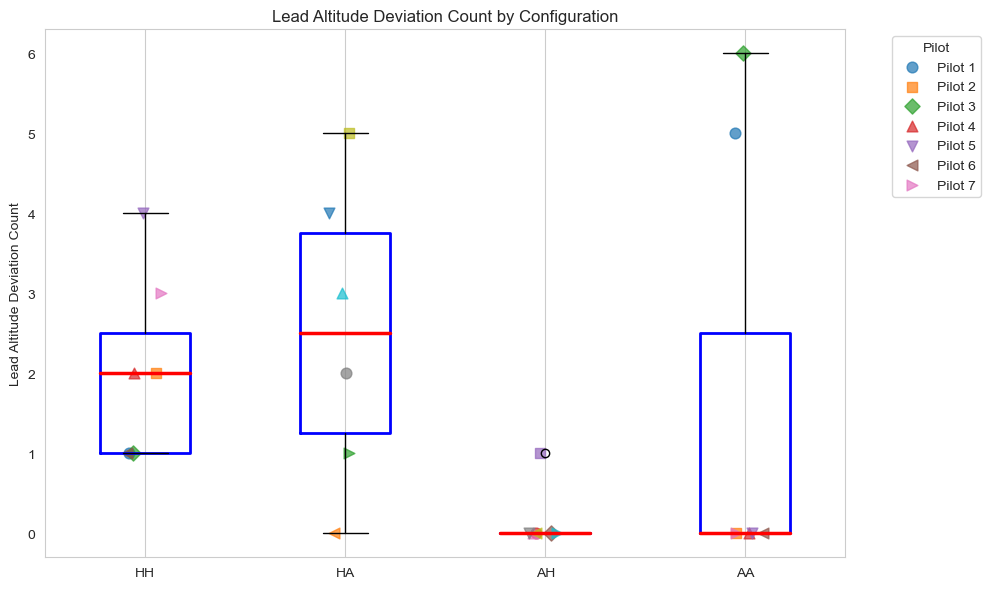

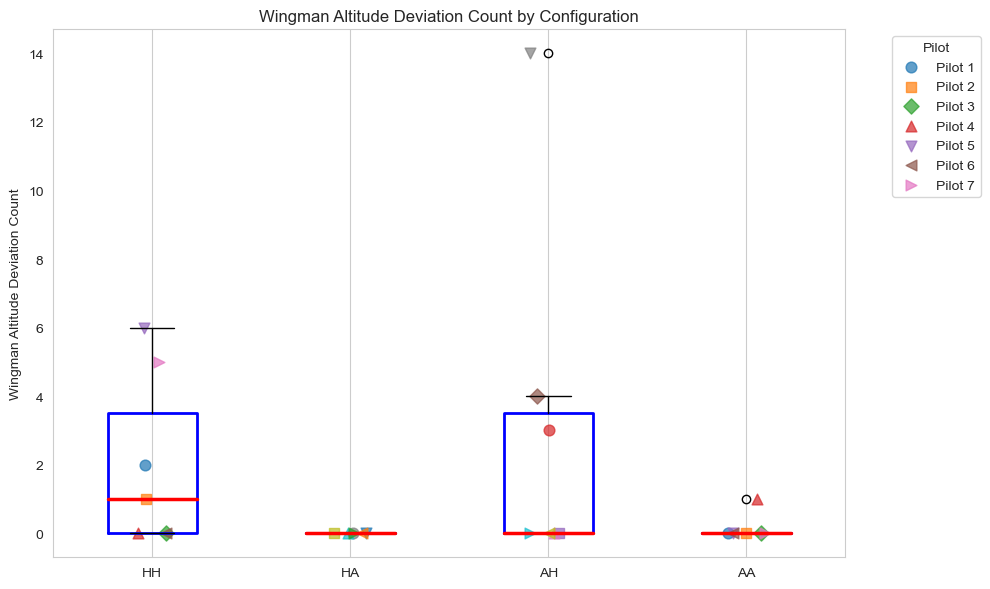

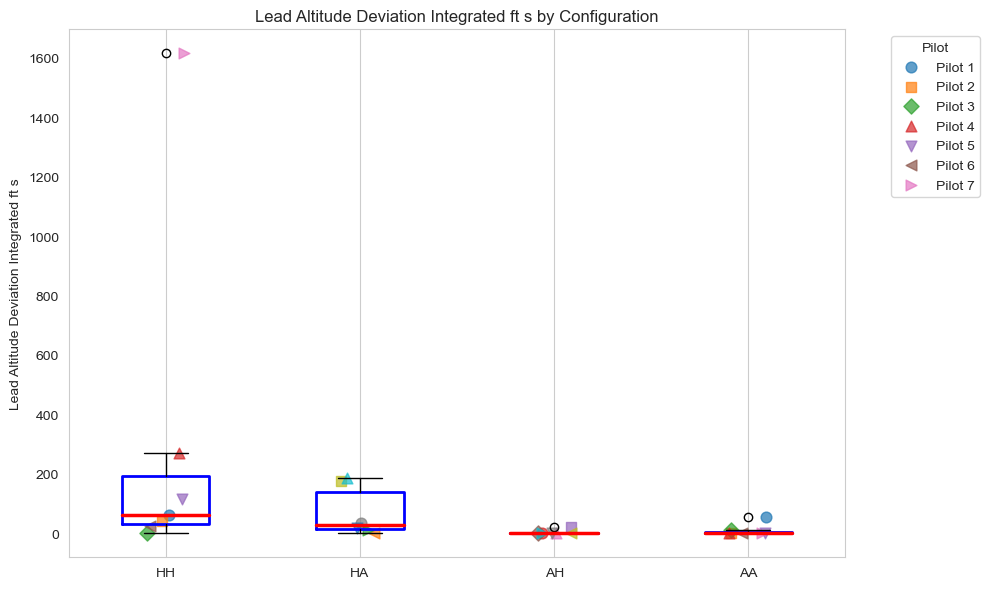

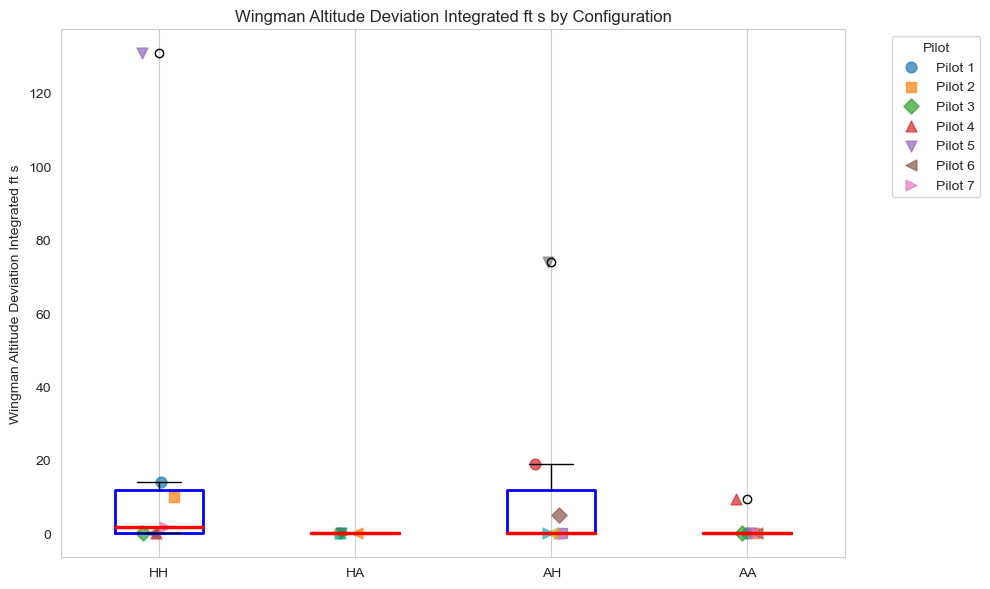

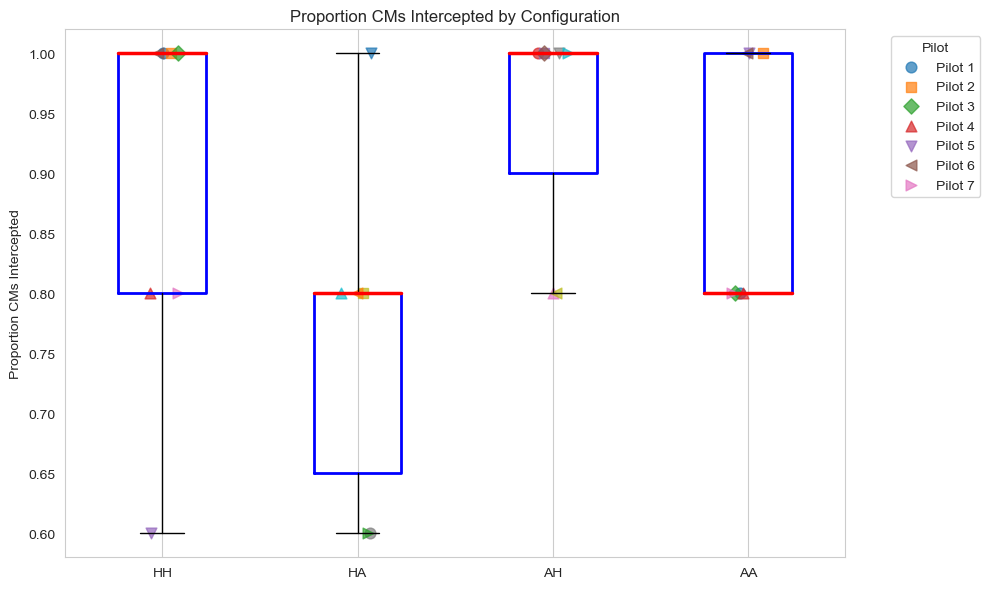

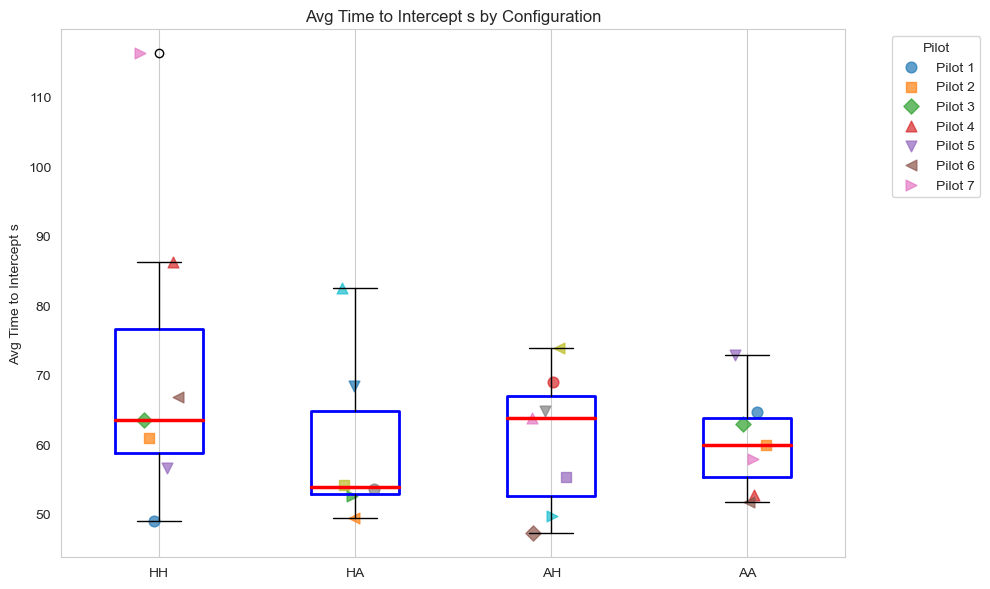

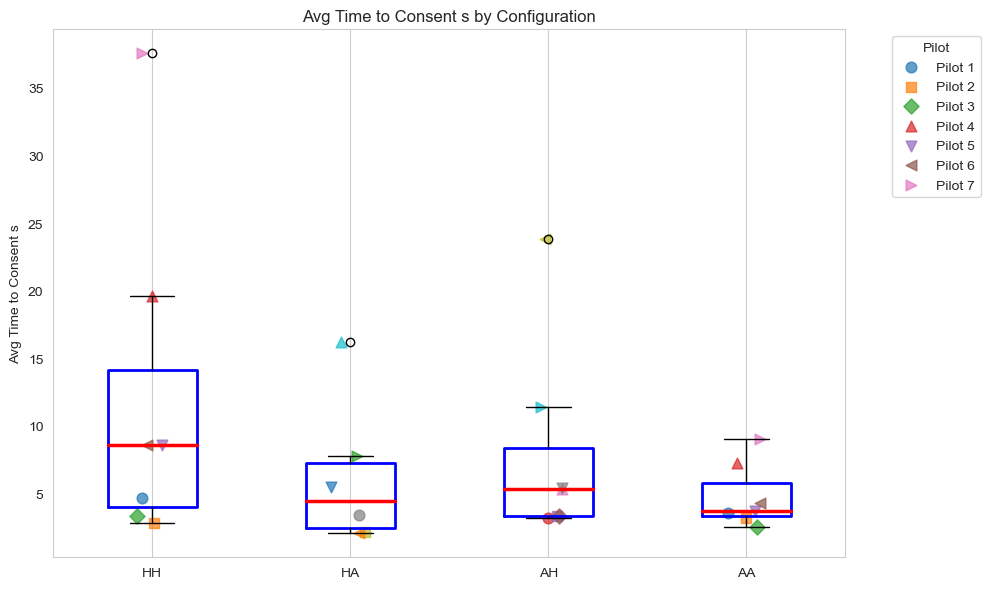

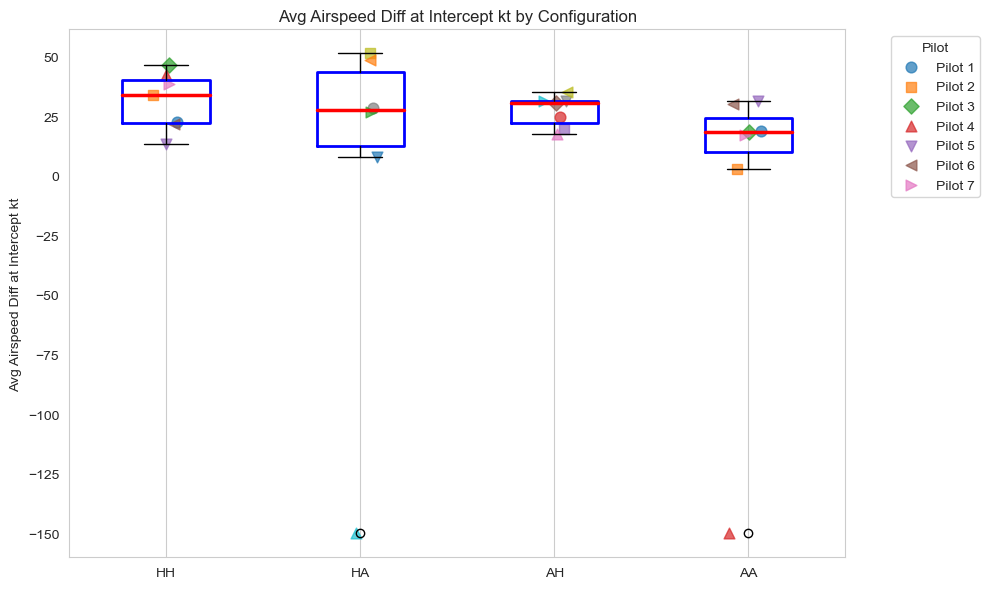

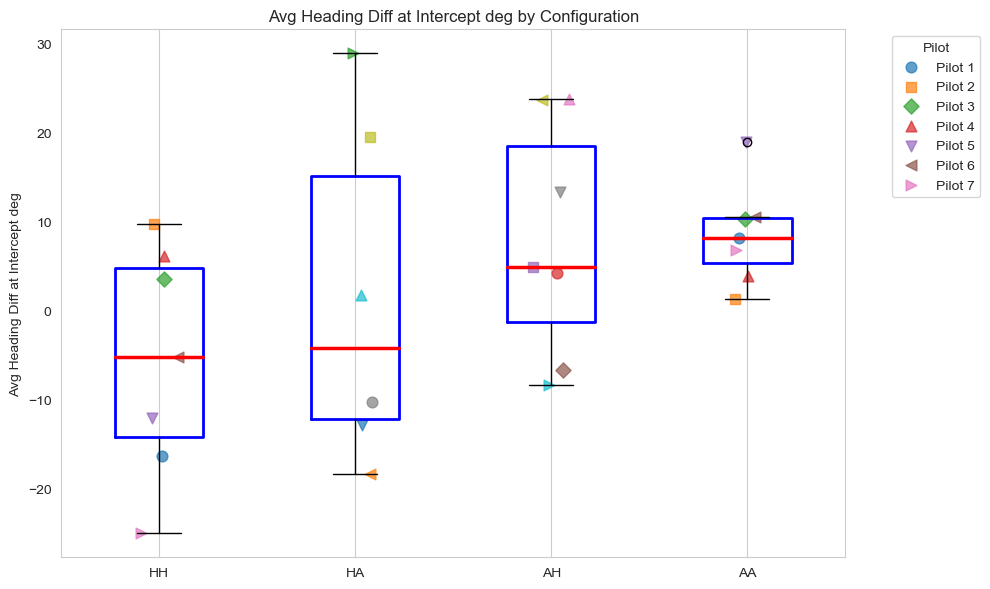

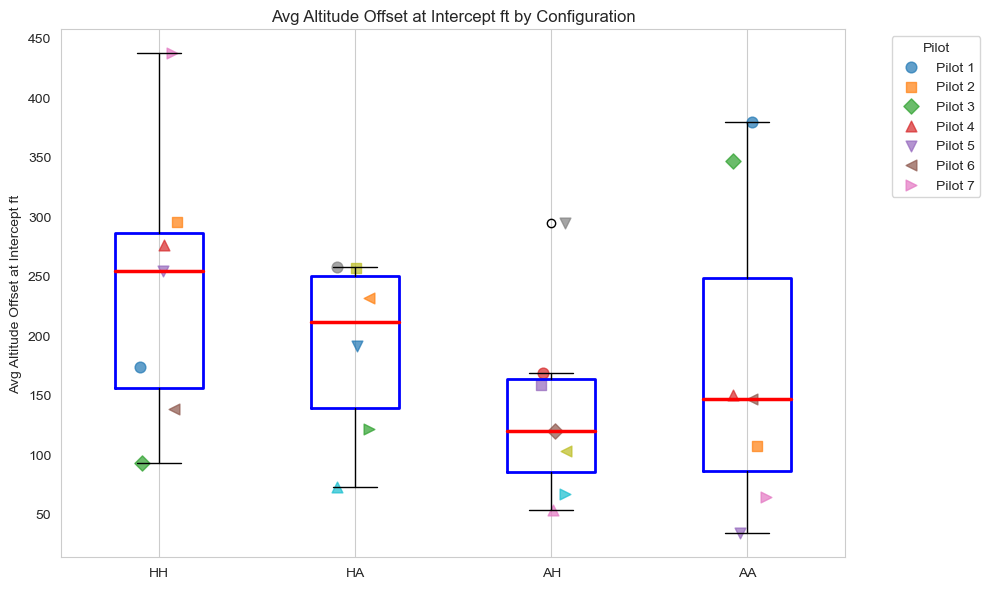

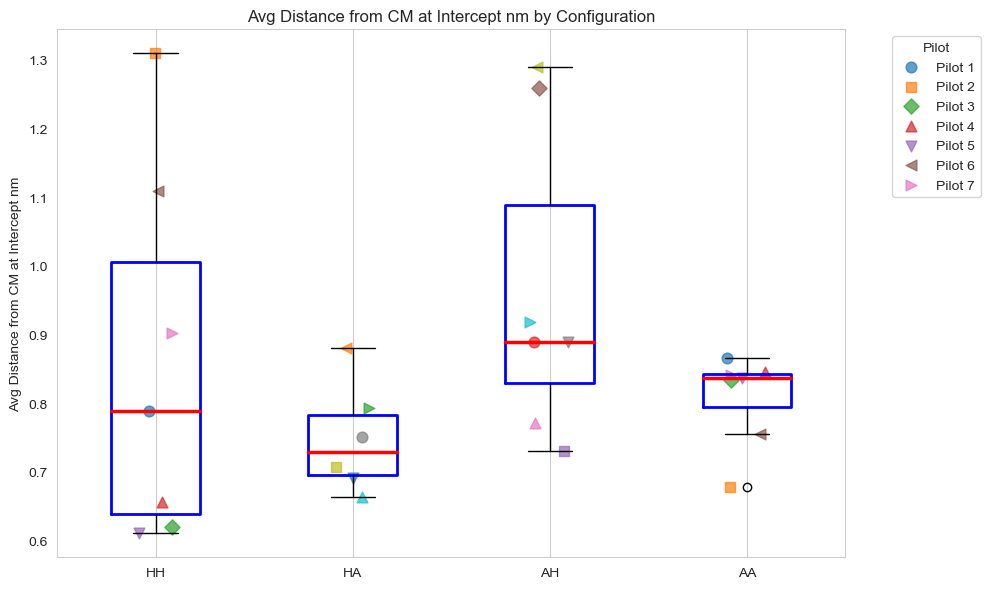

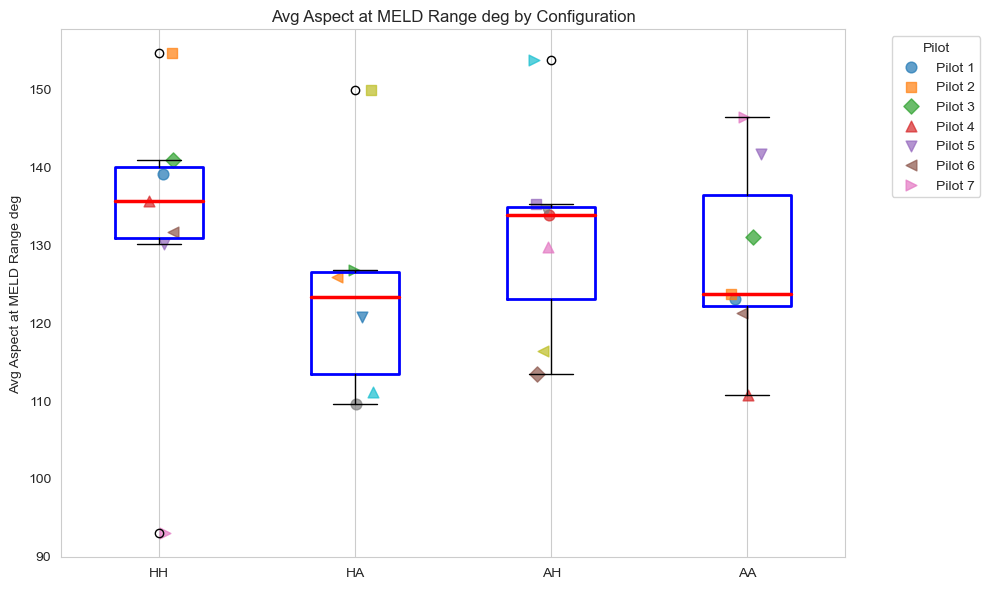

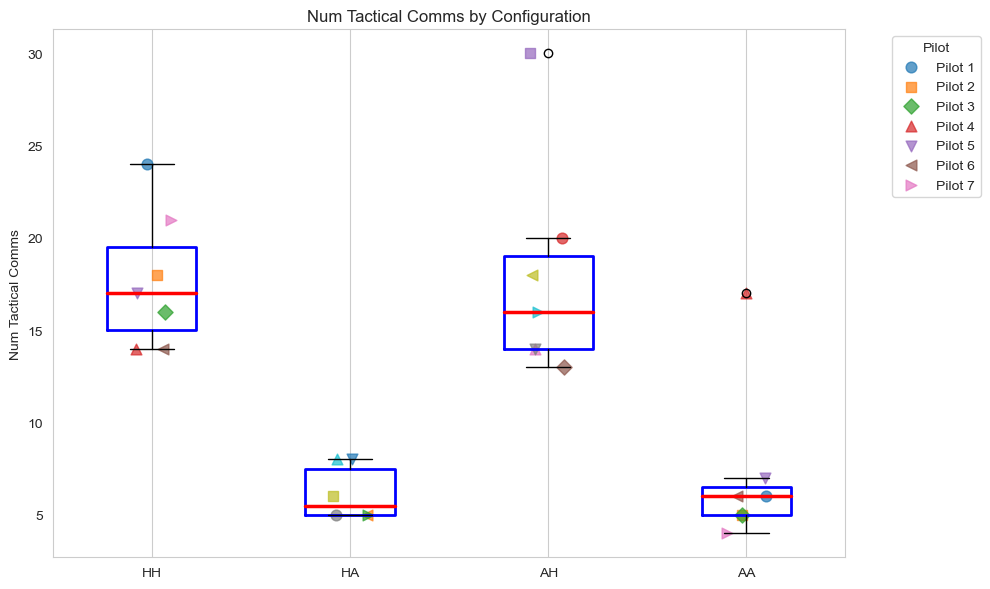

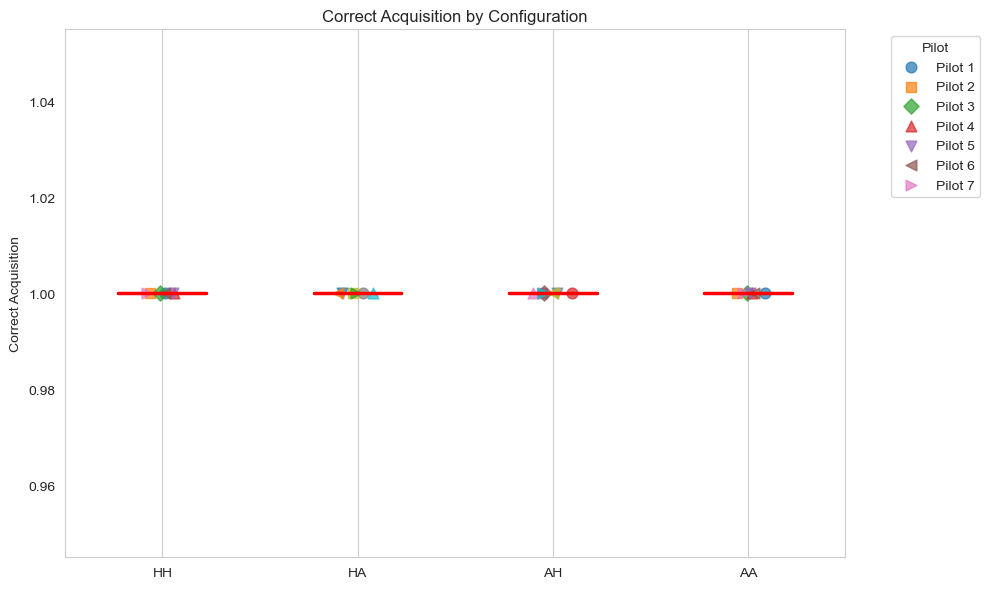

In [90]:
for mop in mop_list:
    plot_mops(df, mop, 'C')

## Scenario D

In [91]:
# next, do the same with scenario D
# read the Scenario_D.xlsx file into a pandas DataFrame, the first tab is 'HH', second is 'HA', the third is 'AH', and teh fourth is 'AA'
# df_d_hh = pd.read_excel('Scenario_D.xlsx', sheet_name='HH')
df_d_ha = pd.read_excel('Scenario_D.xlsx', sheet_name='HA')
# df_d_ah = pd.read_excel('Scenario_D.xlsx', sheet_name='AH')
df_d_aa = pd.read_excel('Scenario_D.xlsx', sheet_name='AA')

# combine the four dataframes into one, adding a new column 'Configuration' to indicate the configuration
# df_d_hh['Configuration'] = 'HH'
df_d_ha['Configuration'] = 'HA'
# df_d_ah['Configuration'] = 'AH'
df_d_aa['Configuration'] = 'AA'
df_d = pd.concat([df_d_ha, df_d_aa], ignore_index=True)

# in df, rename the the pilots to be the following: 'Jacob': Pilot 1, 'Chan': Pilot 2, 'Grimmer': Pilot 3, 'Schnell': Pilot 4, 'McIntyre': Pilot 5, 'Smith': Pilot 6, 'Fleischmann': Pilot 7
df_d['Lead_Pilot'] = df_d['Lead_Pilot'].replace({'Jacob': 'Pilot 1', 'Chan': 'Pilot 2', 'Grimmer': 'Pilot 3', 'Schnell': 'Pilot 4', 'McIntyre': 'Pilot 5', 'Smith': 'Pilot 6', 'Fleischmann': 'Pilot 7'})

In [92]:
df_d['Avg_Time_to_Intercept_s'] = df_d[[f'CM{i}_MOP_Time_to_Intercept_s' for i in range(1, 6)]].mean(axis=1)
df_d['Avg_Time_to_Consent_s'] = df_d[[f'CM{i}_MOP_Time_to_Consent_s' for i in range(1, 6)]].mean(axis=1)
df_d['Avg_Airspeed_Diff_at_Intercept_kt'] = df_d[[f'CM{i}_Airspeed_Diff_at_Intercept_kt' for i in range(1, 6)]].mean(axis=1)
df_d['Avg_Heading_Diff_at_Intercept_deg'] = df_d[[f'CM{i}_Heading_Diff_at_Intercept_deg' for i in range(1, 6)]].mean(axis=1)
df_d['Avg_Altitude_Offset_at_Intercept_ft'] = df_d[[f'CM{i}_Altitude_Offset_at_Intercept_ft' for i in range(1, 6)]].mean(axis=1)
df_d['Avg_Distance_from_CM_at_Intercept_nm'] = df_d[[f'CM{i}_Distance_from_CM_at_Intercept_nm' for i in range(1, 6)]].mean(axis=1)
df_d['Avg_Aspect_at_MELD_Range_deg'] = df_d[[f'CM{i}_Aspect_at_MELD_Range_deg' for i in range(1, 6)]].mean(axis=1)
df_d['Correct_Acquisition'] = df_d['Correct_Sort'].apply(lambda x: 1 if x == 'Y' else 0)

In [93]:
create_data_summary(df_d, 'D')

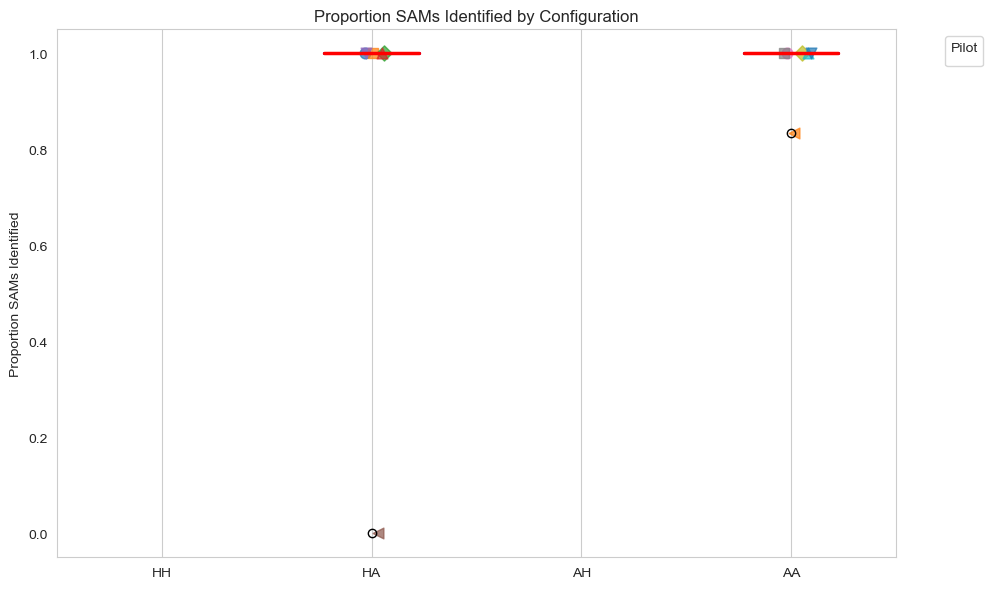

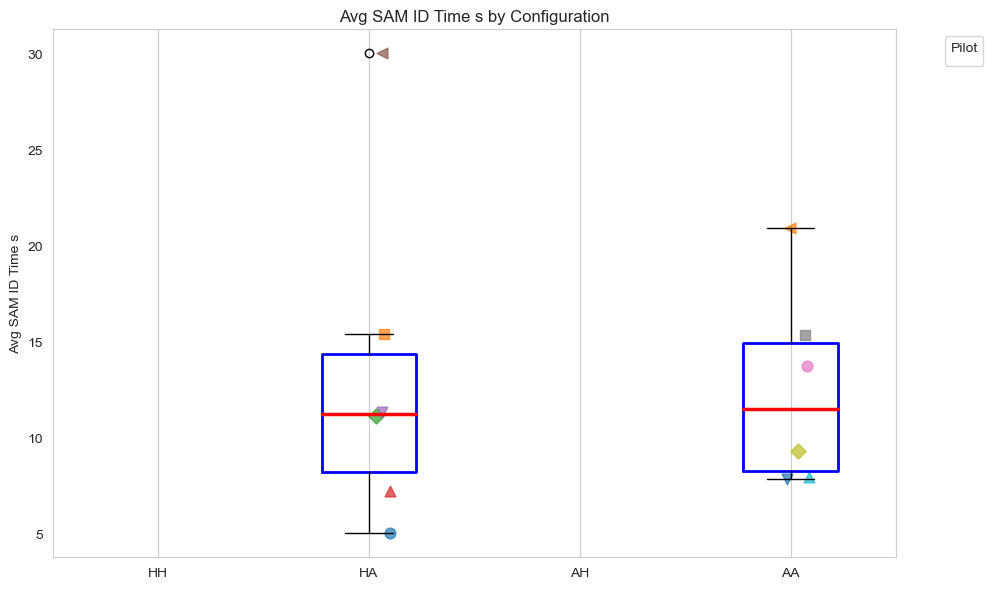

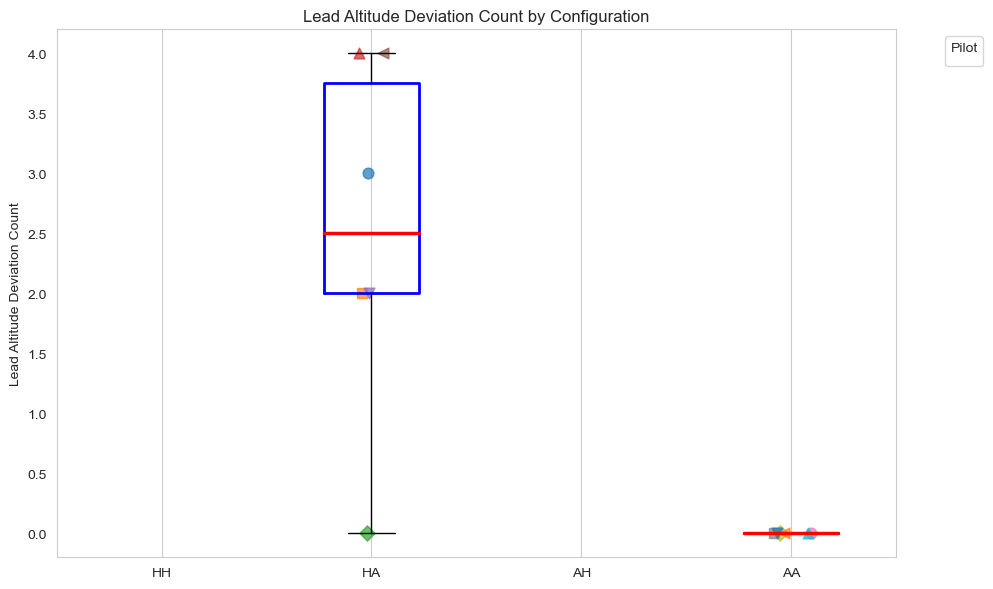

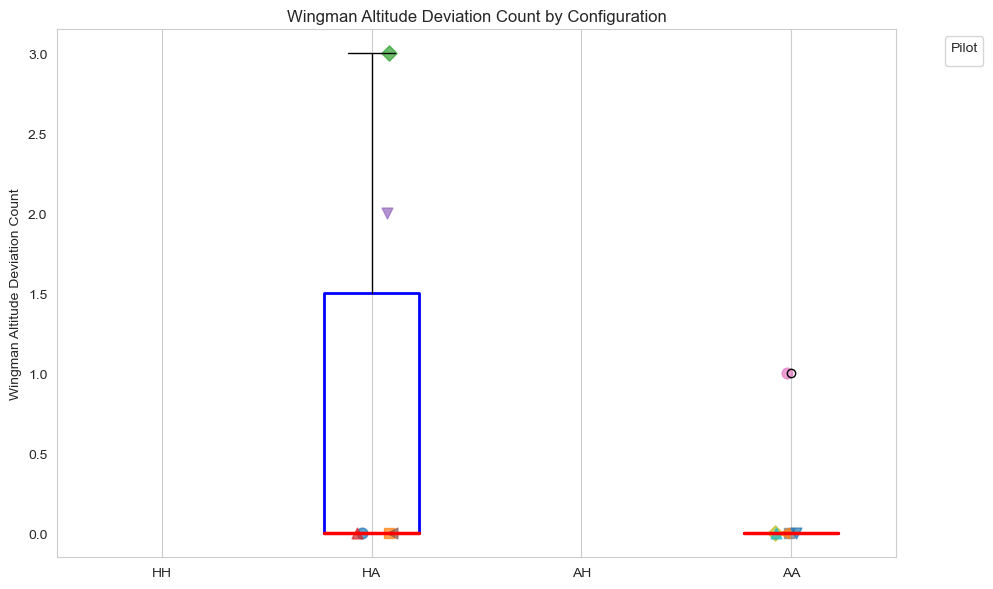

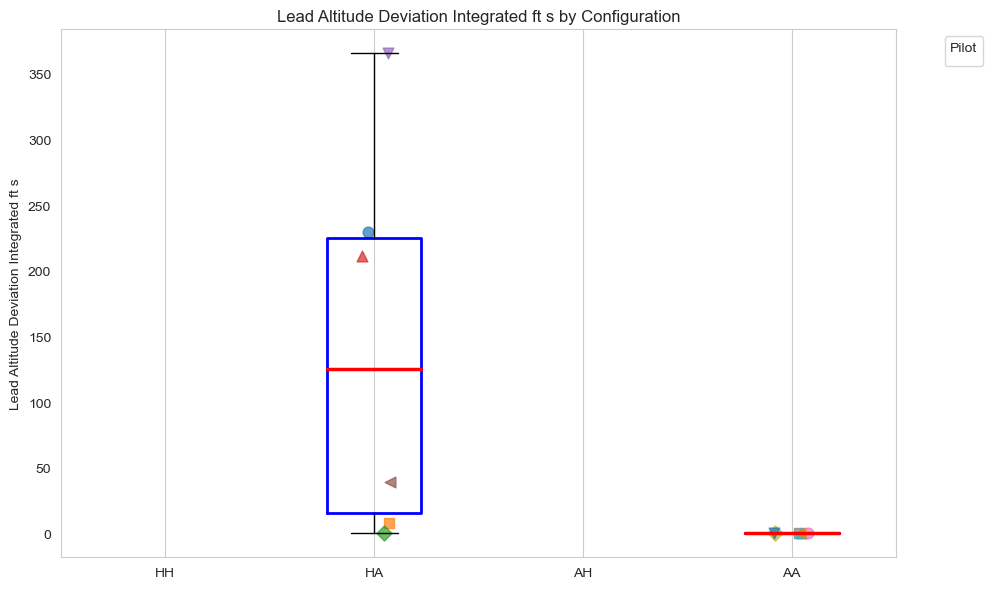

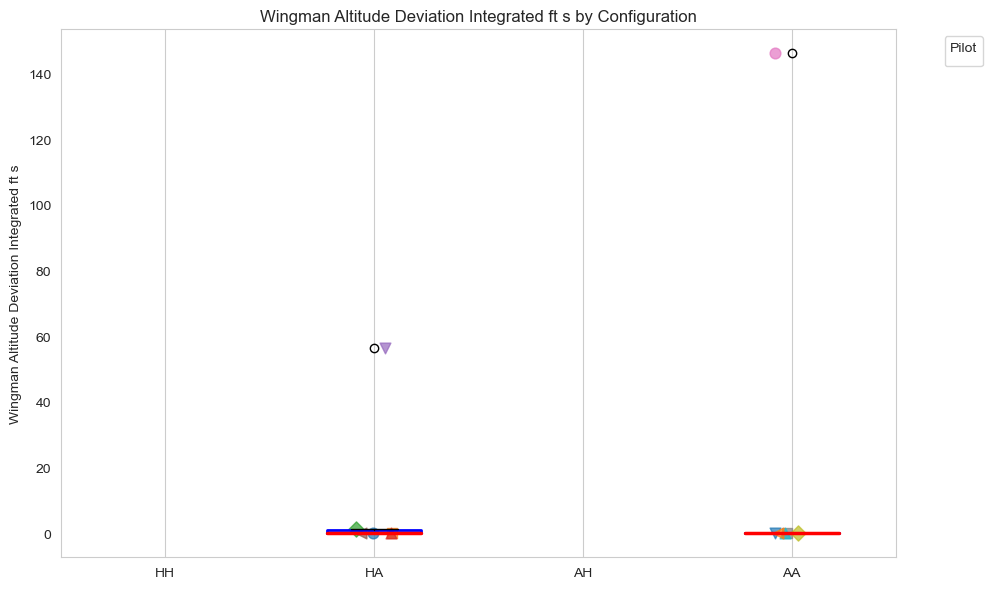

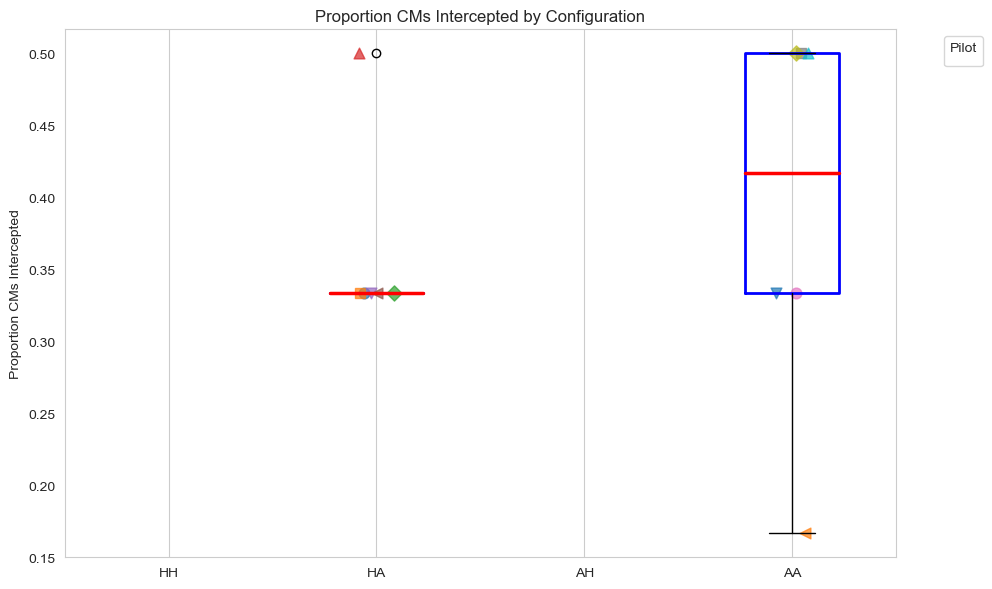

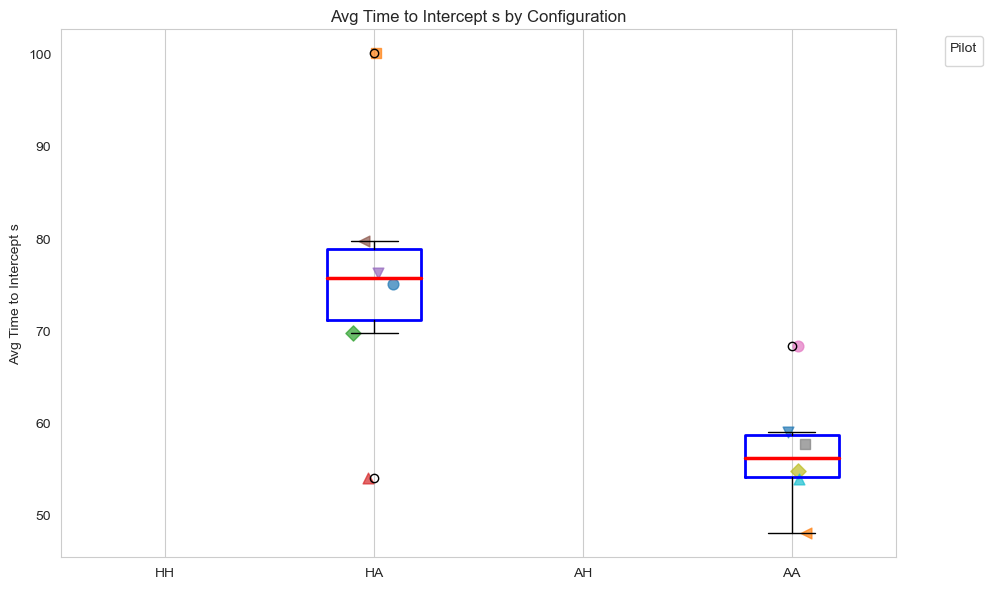

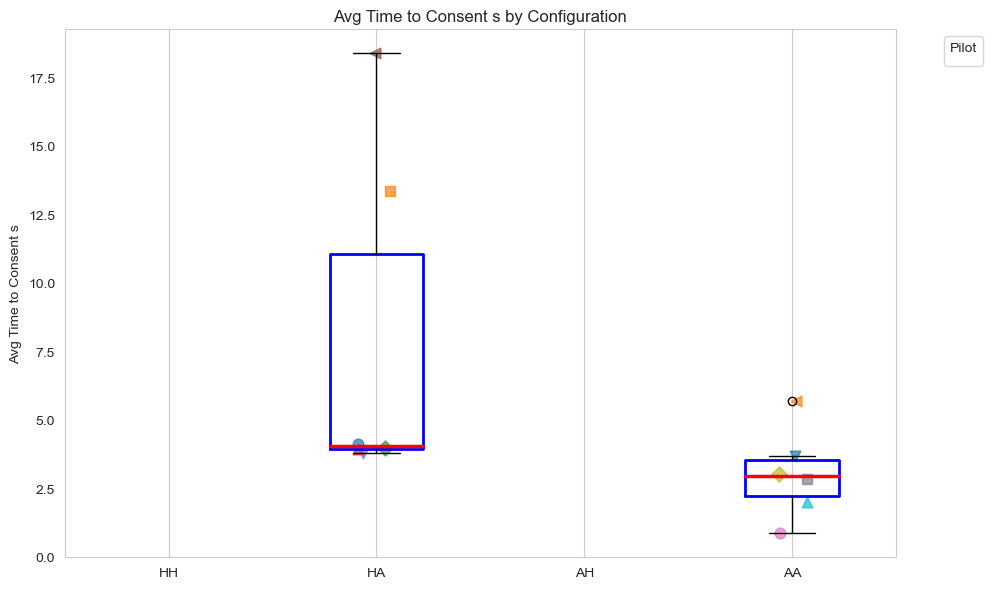

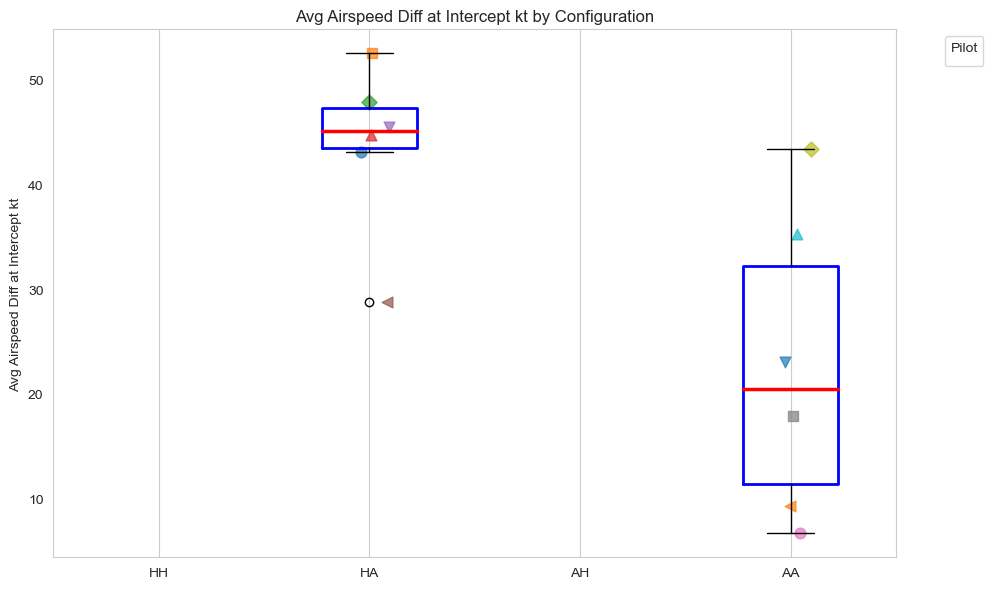

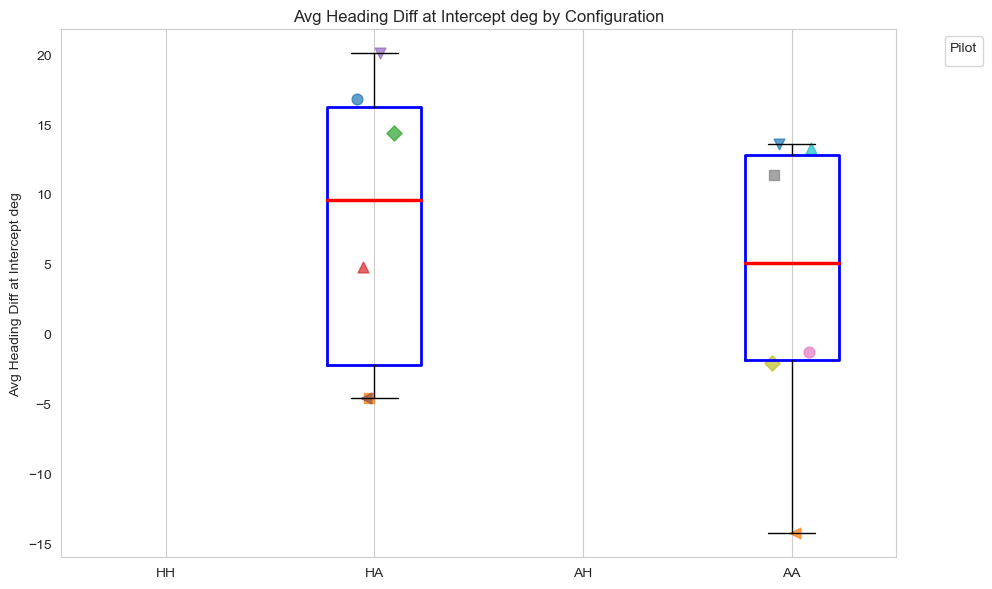

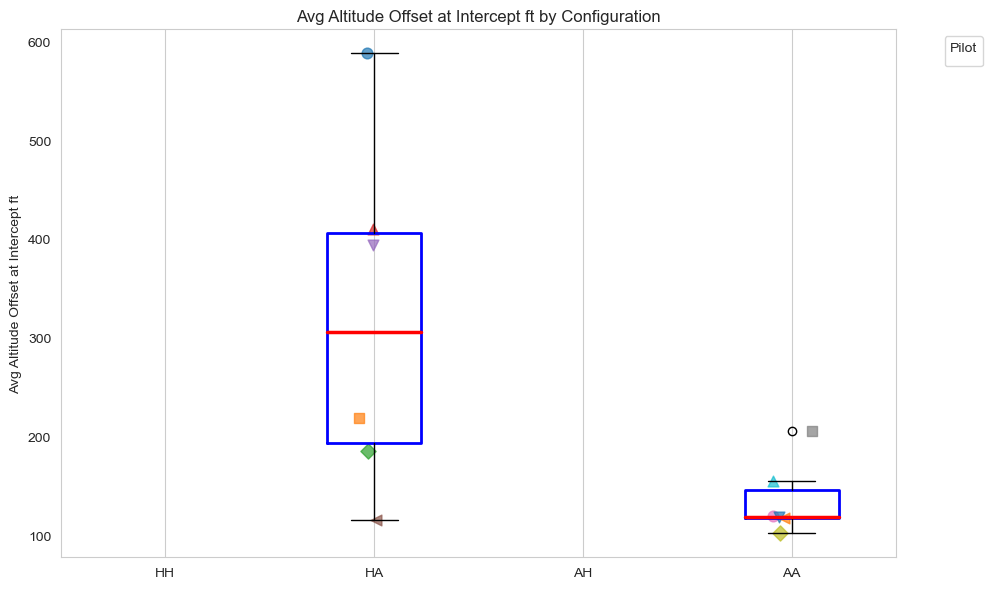

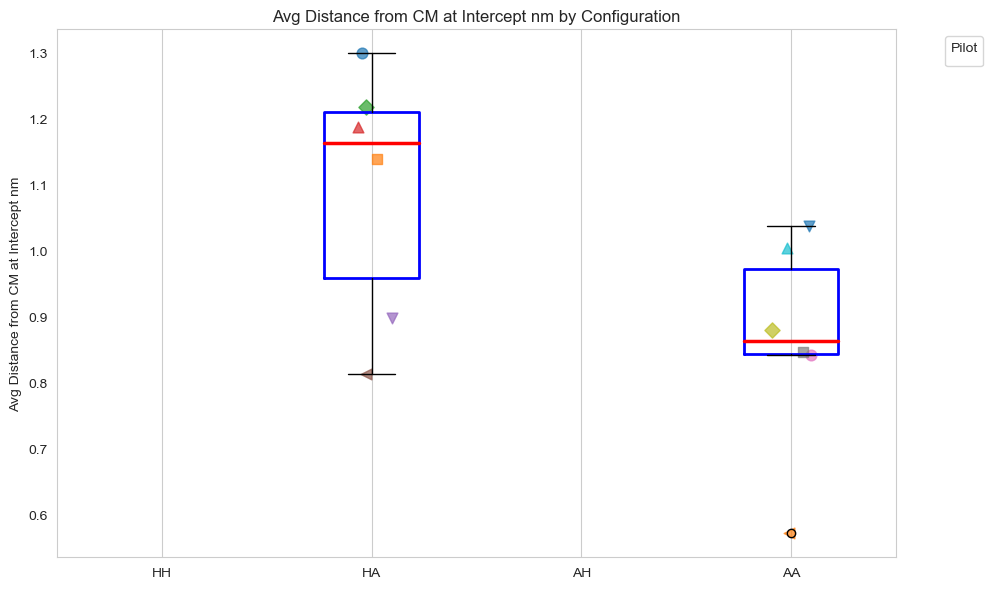

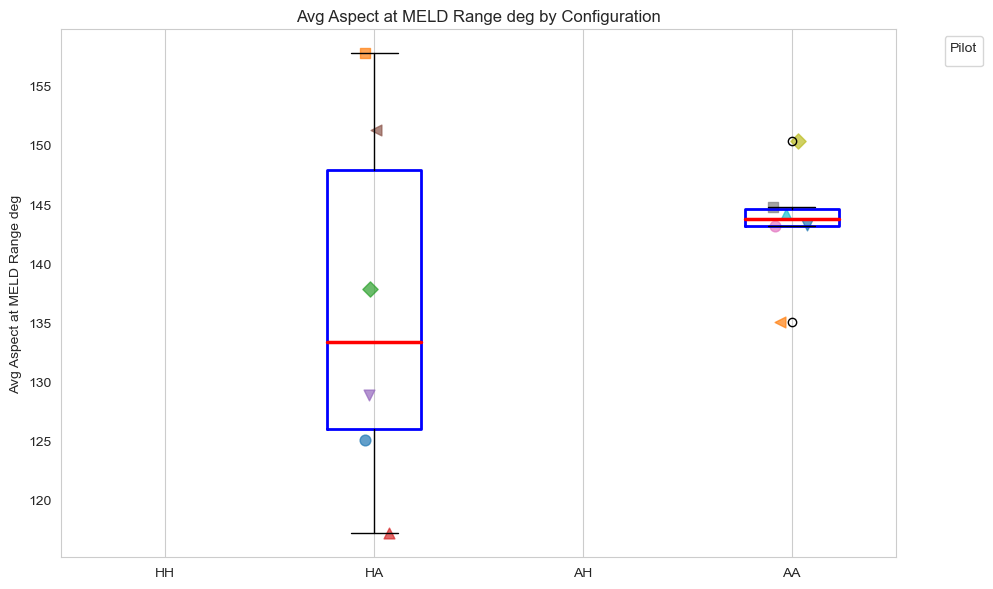

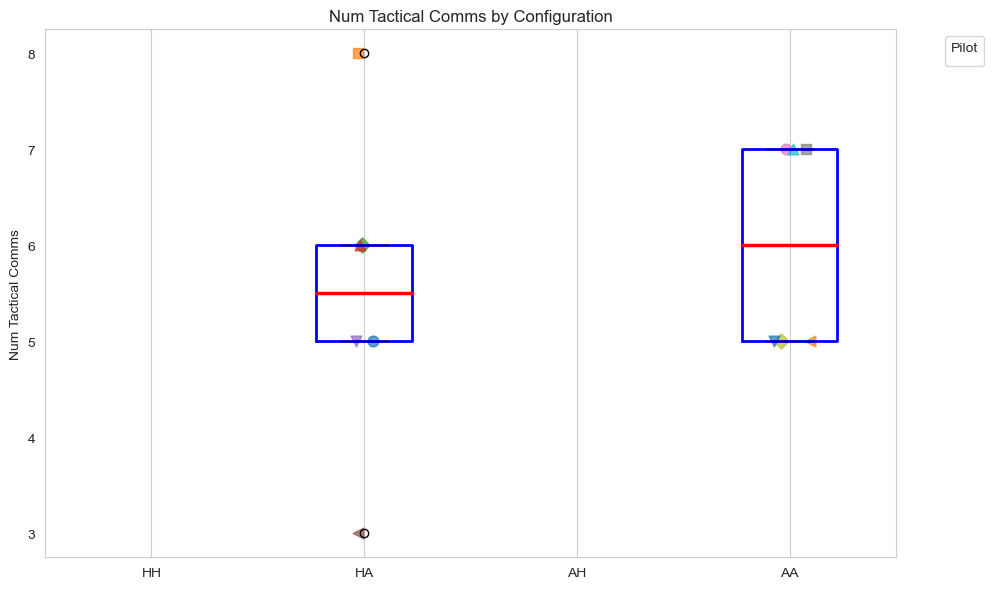

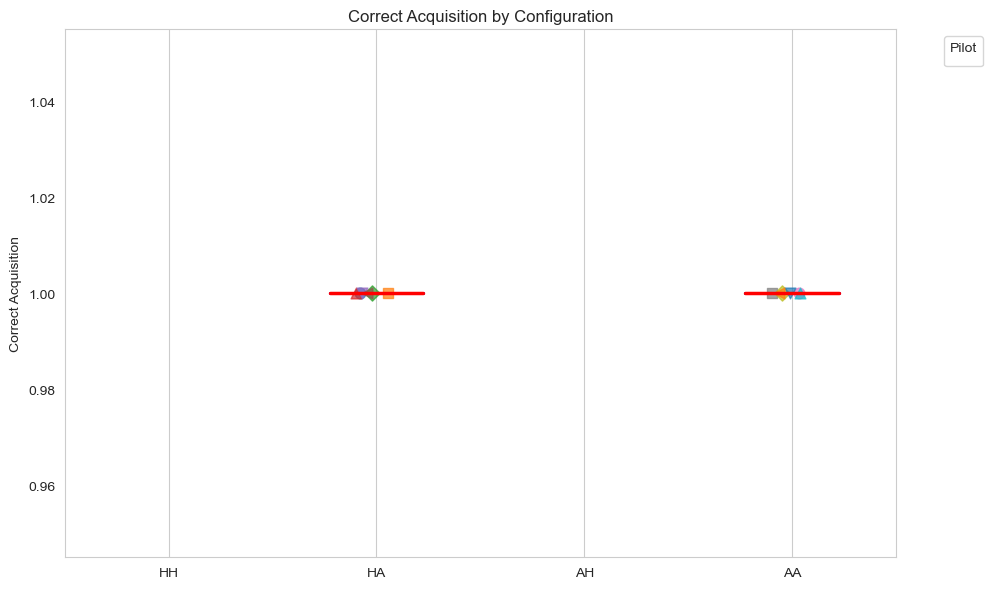

In [94]:
for mop in mop_list:
    plot_mops(df_d, mop, 'D')

## Bedford

In [81]:
bedford = pd.read_excel('Bedford Results.xlsx')

In [82]:
bedford

,Lead,Scenario,Configuration,Bedford
0,Chuck,A,HH,4
1,Chuck,B,HH,3
2,Chuck,A,HA,3
3,Indy,B,HH,5
4,Indy,C,HH,6
5,Indy,D,HH,7
6,Tars,C,HH,4
7,Tars,D,HH,5
8,Tars,C,AA,2
9,MACH,C,HH,6


In [83]:
bedford['Lead_Pilot'] = bedford['Lead'].replace({'Chuck': 'Pilot 1', 'Indy': 'Pilot 2', 'Tars': 'Pilot 3', 'MACH': 'Pilot 4', 'Savage': 'Pilot 5', 'Assassin': 'Pilot 6', 'Pig': 'Pilot 7'})

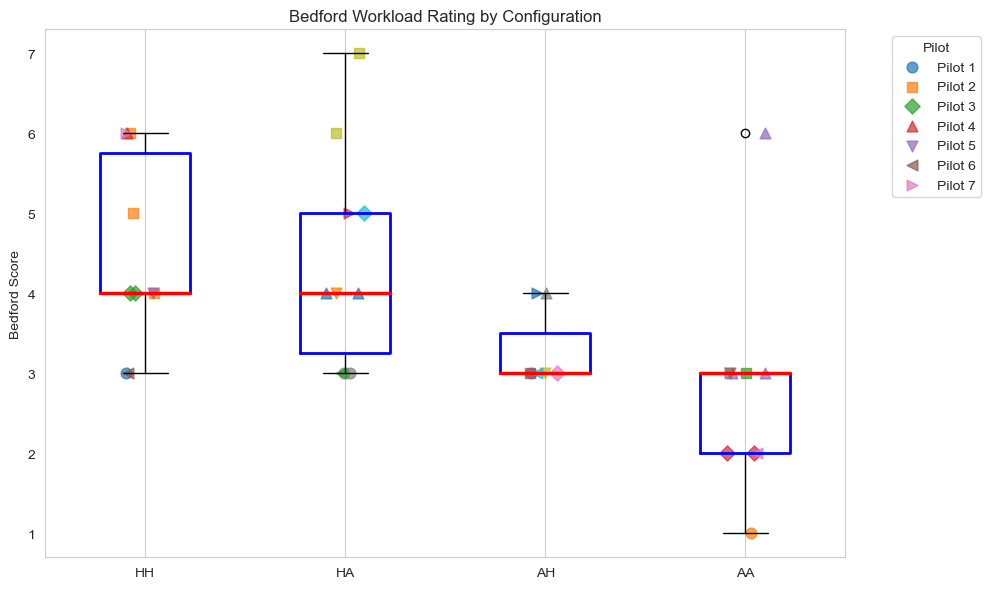

In [95]:
# for bedord Scenario == C, plot the "Bedord" column by Configuration in the same way as above
bedford_c = bedford[bedford['Scenario'] == 'C']

col = 'Bedford'
configs = ['HH', 'HA', 'AH', 'AA']
plt.figure(figsize=(10, 6))
# Boxplot
boxprops = dict(linestyle='-', linewidth=2, color='blue')
medianprops = dict(linestyle='-', linewidth=2.5, color='red')
plt.boxplot(
    [bedford_c[bedford_c['Configuration'] == c][col] for c in configs],
    labels=configs, boxprops=boxprops, medianprops=medianprops
)
# --- Overlay raw data ---
# Assign each pilot a marker
pilot_markers = {
    pilot: marker for pilot, marker in zip(
        sorted(bedford_c['Lead_Pilot'].unique()),
        ['o', 's', 'D', '^', 'v', '<', '>', 'P', 'X', '*']  # add more if needed
    )
}
# Scatter raw points with jitter
for i, config in enumerate(configs, start=1):
    subset = bedford_c[bedford_c['Configuration'] == config]
    for pilot, pilot_df in subset.groupby('Lead_Pilot'):
        jitter = np.random.uniform(-0.1, 0.1, size=len(pilot_df))
        plt.scatter(
            np.full(len(pilot_df), i) + jitter,
            pilot_df[col],
            alpha=0.7,
            s=60,
            label=pilot if i == 1 else None,  # only add to legend once
            marker=pilot_markers[pilot]
        )
col_label = col.replace('_', ' ')
plt.title(f'{col_label} Workload Rating by Configuration')
plt.ylabel(f'{col_label} Score')
plt.grid(axis='y')
# Unique legend for pilots
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Pilot', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(f'Workload/{col}.jpg', dpi=500)